Taken from here:
https://peterroelants.github.io/posts/multi-armed-bandit-implementation/

In [1]:
%matplotlib inline

import sys
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)

In [2]:
# Define the multi-armed bandits
# True probability of winning for each bandit
p_bandits = [0.4, 0.55, 0.60]
nb_bandits = len(p_bandits)  # Number of bandits


def pull(i):
    """Pull arm of bandit with index `i` and return 1 if win, 
    else return 0."""
    if np.random.rand() < p_bandits[i]:
        return 1
    else:
        return 0

In [3]:
# Define plotting functions
# Iterations to plot
plots = [1, 2, 5, 10, 25, 50, 100, 200, 500, 1000, 1500, 2000]


def plot(priors, step, ax):
    """Plot the priors for the current step."""
    plot_x = np.linspace(0.001, .999, 100)
#    stds = [str(p.std()) for p in priors]
#    stds_desc = ",\n".join(stds)
    for prior in priors:
        y = prior.pdf(plot_x)
        p = ax.plot(plot_x, y)
        ax.fill_between(plot_x, y, 0, alpha=0.2)
    ax.set_xlim([0, 1])
    ax.set_ylim(bottom=0)
    ax.set_title(
        f'Priors at step {step:d}'
#        + f', \n sds: {stds_desc}'
    )
#

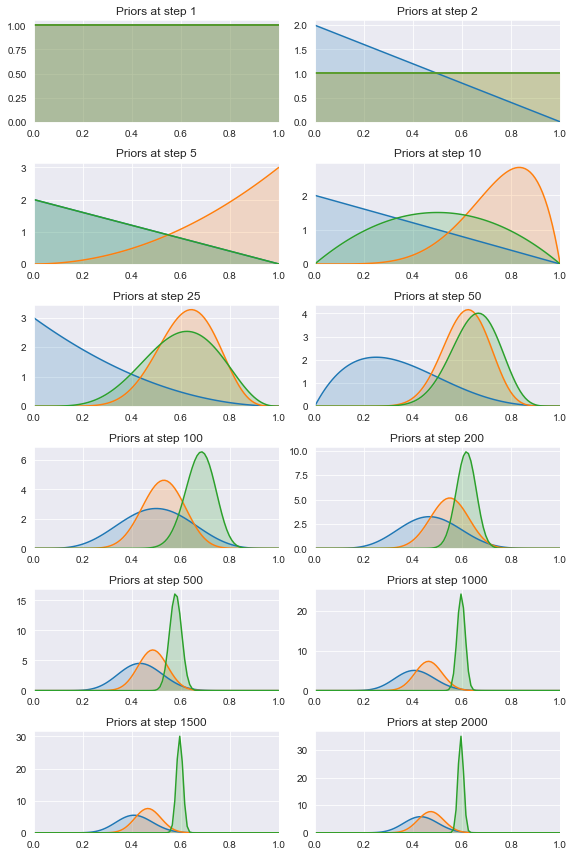

In [4]:
# Simulate multi-armed bandit process and update posteriors

# Setup plot
fig, axs = plt.subplots(6, 2, figsize=(8, 12))
axs = axs.flat

# The number of trials and wins will represent the prior for each
#  bandit with the help of the Beta distribution.
trials = [0, 0, 0]  # Number of times we tried each bandit
wins = [0, 0, 0]  # Number of wins for each bandit

n = 2000
# Run the trail for `n` steps
for step in range(1, n+1):
    # Define the prior based on current observations
    bandit_priors = [
        stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, wins)]
    # plot prior 
    if step in plots:
        plot(bandit_priors, step, next(axs))
    # Sample a probability theta for each bandit
    theta_samples = [
        d.rvs(1) for d in bandit_priors
    ]
    # choose a bandit
    chosen_bandit = np.argmax(theta_samples)
    # Pull the bandit
    x = pull(chosen_bandit)
    # Update trials and wins (defines the posterior)
    trials[chosen_bandit] += 1
    wins[chosen_bandit] += x

plt.tight_layout()
plt.show()